# Assignment For This Week
Develop program menggunakan algoritma k-means clustring untuk data 20newsgroups 3 kelas: Sport, Religion dan Technology. Sumber materi dapat diakses di https://tita.lecturer.pens.ac.id/TextMining_SDT/M10.%20Text%20Clustering/Text%20Clustering%20with%20TF-IDF%20in%20Python.pdf

Dengan ketentuan:

#### A. Data dalam bentuk Bag of Words
1. menggunakan rumus jarak Euclidean Distance
2. menggunakan rumus jarak Cosine Similarity

### B. Data dalam bentuk TF/IDF
1. menggunakan rumus jarak Euclidean Distance
2. menggunakan rumus jarak Cosine Similarity

### C. Data dalam bentuk Count Vectorizer
1. menggunakan rumus jarak Euclidean Distance
2. menggunakan rumus jarak Cosine Similarity

#### D. Data dalam bentuk Vocabulary menggunakan rumus jarak Jaccard Index

Buat analisa hasil klaster menggunakan metric performance DBI dan Silhoute score. 
Sajikan dalma bentuk presentasi. Unggah file ppt nya.

# Library

In [1]:
# import the dataset from sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics

# import other required libs
import pandas as pd
import numpy as np

# string manipulation libs
import re
import string
import nltk
from nltk.corpus import stopwords

# viz libs
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [2]:
for i in fetch_20newsgroups().target_names:
    print(i)

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


In [3]:
categories = [
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'rec.sport.hockey',
 'rec.sport.baseball',
 'alt.atheism',
 'soc.religion.christian'
]
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))
df = pd.DataFrame(dataset.data, columns=["corpus"])
df

,corpus
0,"\nThey tried their best not to show it, believ..."
1,\nStankiewicz? I doubt it.\n\nKoufax was one ...
2,\n[deletia- and so on]\n\nI seem to have been ...
3,"Excuse the sheer newbieness of this post, but ..."
4,==============================================...
...,...
3446,"\n Or, with no dictionary available, they cou..."
3447,\n\nSorry to disappoint you but the Red Wings ...
3448,\n: Can anyone tell me where to find a MPEG vi...
3449,\n


In [4]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [5]:
df['cleaned'] = df['corpus'].apply(lambda x: preprocess_text(x, remove_stopwords=True))
df.tail(5)

,corpus,cleaned
3446,"\n Or, with no dictionary available, they cou...",dictionary available could gain first hand kno...
3447,\n\nSorry to disappoint you but the Red Wings ...,sorry disappoint red wings earned victory easi...
3448,\n: Can anyone tell me where to find a MPEG vi...,anyone tell find mpeg viewer either dos window...
3449,\n,
3450,"\nHey Valentine, I don't see Boston with any w...",hey valentine see boston world series rings fi...


# A. Bag Of Words

In [28]:
# initialize the vectorizer
vectorizer = CountVectorizer(binary=True)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['cleaned'])

In [29]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Euclidian

In [30]:
# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_
print(clusters)

c:\Users\BAGAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[2 2 2 ... 2 2 2]


In [31]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [32]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1
print(df)

                                                 corpus  \
0     \nThey tried their best not to show it, believ...   
1     \nStankiewicz?  I doubt it.\n\nKoufax was one ...   
2     \n[deletia- and so on]\n\nI seem to have been ...   
3     Excuse the sheer newbieness of this post, but ...   
4     ==============================================...   
...                                                 ...   
3446  \n  Or, with no dictionary available, they cou...   
3447  \n\nSorry to disappoint you but the Red Wings ...   
3448  \n: Can anyone tell me where to find a MPEG vi...   
3449                                                 \n   
3450  \nHey Valentine, I don't see Boston with any w...   

                                                cleaned  cluster        x0  \
0     tried best show believe surprised find sprint ...        2 -0.881954   
1     stankiewicz doubt koufax one two jewish hofs h...        2 -0.319891   
2     deletia seem rather unclear asking please show...  

In [33]:
# Compute DBI score
dbi = metrics.davies_bouldin_score(X.toarray(), clusters)

# Compute Silhoutte Score
ss = metrics.silhouette_score(X.toarray(), clusters , metric='euclidean')

# Print the DBI and Silhoutte Scores
print("DBI Score: ", dbi, "\nSilhoutte Score: ", ss)

DBI Score:  3.699269502542991 
Silhoutte Score:  0.38649299254137337


In [34]:
def get_top_keywords(n_terms):
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        # for each row of the dataframe, find the n terms that have the highest tf idf score
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) 
            
get_top_keywords(10)


Cluster 0
directory,satellite,disk,san,display,distributed,distribution,runs,dimensional,review

Cluster 1
also,say,even,know,people,think,time,like,would,one

Cluster 2
good,could,also,anyone,get,think,know,like,one,would


In [35]:
# map clusters to appropriate labels 
cluster_map = {0: "technology", 1: "Religion", 2: "Sports"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

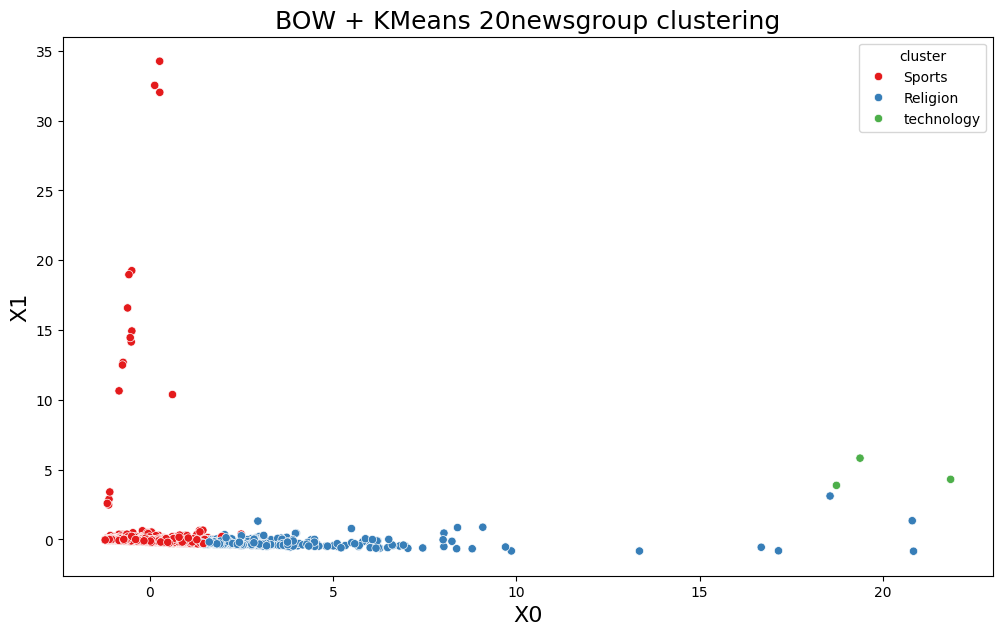

In [36]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("BOW + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="Set1")
plt.show()

### Cosine

# B. TF/IDF

# C. Count Vectorizer

# D. Jaccard Index

In [6]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import jaccard_score
import numpy as np

# Daftar pasangan topik yang diinginkan
topic_pairs = [('comp.graphics', 'comp.os.ms-windows.misc'),
               ('rec.sport.hockey', 'rec.sport.baseball'),
               ('alt.atheism', 'soc.religion.christian')]

# Muat dataset 20 Newsgroups
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), categories=[pair[0] for pair in topic_pairs] + [pair[1] for pair in topic_pairs])

# Inisialisasi TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Ubah dokumen menjadi vektor fitur
X = vectorizer.fit_transform(newsgroups.data)

# Inisialisasi matriks untuk menyimpan skor Jaccard
jaccard_scores = np.zeros((len(topic_pairs), len(topic_pairs)))

# Hitung skor Jaccard antara setiap pasangan topik
for i in range(len(topic_pairs)):
    for j in range(i, len(topic_pairs)):
        topic1_index = newsgroups.target_names.index(topic_pairs[i][0])
        topic2_index = newsgroups.target_names.index(topic_pairs[j][1])
        
        topic1_documents = X[newsgroups.target == topic1_index]
        topic2_documents = X[newsgroups.target == topic2_index]
        
        min_num_documents = min(topic1_documents.shape[0], topic2_documents.shape[0])
        
        topic1_bin = (topic1_documents > 0).astype(int)[:min_num_documents]
        topic2_bin = (topic2_documents > 0).astype(int)[:min_num_documents]
        
        jaccard = jaccard_score(topic1_bin, topic2_bin, average='micro')
        
        jaccard_scores[i, j] = jaccard
        jaccard_scores[j, i] = jaccard

# Cetak matriks skor Jaccard
print("======================== Jaccard Similarity Scores : ========================")
for i in range(len(topic_pairs)):
    for j in range(len(topic_pairs)):
        topic1 = topic_pairs[i][0]
        topic2 = topic_pairs[j][1]
        similarity_score = jaccard_scores[i, j]
        print(f"|.| Jaccard Similarity between '{topic1}' and '{topic2}': {similarity_score}")

# Cetak rata-rata skor Jaccard
average_similarity = np.mean(jaccard_scores)
print(f"\n<.> Average Jaccard Similarity: {average_similarity}")

======================== Jaccard Similarity Scores : ========================
|.| Jaccard Similarity between 'comp.graphics' and 'comp.os.ms-windows.misc': 0.04045652545697816
|.| Jaccard Similarity between 'comp.graphics' and 'rec.sport.baseball': 0.051426588626572914
|.| Jaccard Similarity between 'comp.graphics' and 'soc.religion.christian': 0.0594587549239206
|.| Jaccard Similarity between 'rec.sport.hockey' and 'comp.os.ms-windows.misc': 0.051426588626572914
|.| Jaccard Similarity between 'rec.sport.hockey' and 'rec.sport.baseball': 0.05591025525506198
|.| Jaccard Similarity between 'rec.sport.hockey' and 'soc.religion.christian': 0.06380085765087334
|.| Jaccard Similarity between 'alt.atheism' and 'comp.os.ms-windows.misc': 0.0594587549239206
|.| Jaccard Similarity between 'alt.atheism' and 'rec.sport.baseball': 0.06380085765087334
|.| Jaccard Similarity between 'alt.atheism' and 'soc.religion.christian': 0.07828167060455385

<.> Average Jaccard Similarity: 0.05822453930214752
